# Customer segmentation

In [231]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [232]:
data = pd.read_csv("data\HotelCustomersDataset.csv")

In [233]:
data.head(3)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
data.shape

(83590, 31)

In [235]:
features = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [236]:
data.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

### Checking missing values

In [237]:
data.isnull().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

### Identify duplicates

In [238]:
dups = data.duplicated()
data[dups]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom


### Columns info

In [239]:
data.select_dtypes(include='object')

,Nationality,NameHash,DocIDHash,DistributionChannel,MarketSegment
0,PRT,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,Corporate,Corporate
1,PRT,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,Travel Agent/Operator,Travel Agent/Operator
2,DEU,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,Travel Agent/Operator,Travel Agent/Operator
3,FRA,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,Travel Agent/Operator,Travel Agent/Operator
4,FRA,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,Travel Agent/Operator,Travel Agent/Operator
...,...,...,...,...,...
83585,ITA,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,Travel Agent/Operator,Other
83586,IRL,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,Travel Agent/Operator,Other
83587,IRL,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,Travel Agent/Operator,Other
83588,IRL,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,Travel Agent/Operator,Other


In [240]:
data['Nationality'].value_counts()

FRA    12422
PRT    11597
DEU    10232
GBR     8656
ESP     4902
       ...  
GIN        1
KNA        1
GNQ        1
JEY        1
NPL        1
Name: Nationality, Length: 188, dtype: int64

In [241]:
data['DistributionChannel'].value_counts()

Travel Agent/Operator      68569
Direct                     11912
Corporate                   2600
Electronic Distribution      509
Name: DistributionChannel, dtype: int64

In [242]:
data['MarketSegment'].value_counts()

Other                    48039
Travel Agent/Operator    11670
Direct                   11457
Groups                    9501
Corporate                 2169
Complementary              510
Aviation                   244
Name: MarketSegment, dtype: int64

#### Float columns

In [243]:
data.select_dtypes(include="float")

,Age,LodgingRevenue,OtherRevenue
0,51.0,371.0,105.3
1,NaN,280.0,53.0
2,31.0,0.0,0.0
3,60.0,240.0,60.0
4,51.0,0.0,0.0
...,...,...,...
83585,54.0,0.0,0.0
83586,47.0,327.1,277.5
83587,53.0,0.0,0.0
83588,85.0,981.3,9.0


#### Integer columns

In [244]:
data.select_dtypes(include="int")

,ID,DaysSinceCreation,AverageLeadTime,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,150,45,1,0,3,8,5,151,1074,...,0,0,0,0,0,0,0,0,0,0
1,2,1095,61,0,0,1,10,5,1100,1100,...,0,0,0,0,0,0,0,0,0,0
2,3,1095,0,0,0,0,0,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,4,1095,93,0,0,1,10,5,1100,1100,...,0,0,0,0,0,0,0,0,0,0
4,5,1095,0,0,0,0,0,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,0,0,0,0,0,0,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
83586,83587,0,109,0,0,1,6,3,3,3,...,0,0,0,0,1,0,0,0,0,0
83587,83588,0,0,0,0,0,0,0,-1,-1,...,0,0,0,0,1,0,0,0,0,0
83588,83589,0,109,0,0,1,6,3,3,3,...,0,0,0,0,0,1,0,0,0,0


### Encoding categorical features

In [245]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Nationality',
 'NameHash',
 'DocIDHash',
 'DistributionChannel',
 'MarketSegment']

In [246]:
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  int32  
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  int32  
 5   DocIDHash             83590 non-null  int32  
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

### Handling missing values

#### with most frequent value

In [247]:
data_with_most_frequent = data.copy()
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_with_most_frequent['Age'] = imp_most_frequent.fit_transform(data['Age'].values.reshape(-1,1))[:,0]
data_with_most_frequent.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

#### with KNN method

In [248]:
data_with_knn = data.copy()
imp_knn = KNNImputer(n_neighbors=2)
data_with_knn['Age'] = imp_knn.fit_transform(data['Age'].values.reshape(-1,1))[:,0]
data_with_knn.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

### Descriptive statistics

In [249]:
data.describe()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,75.550114,45.398028,453.640902,40324.441213,38045.935973,66.196028,298.802087,67.589132,0.002022,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,45.869324,16.572368,313.390291,23285.983630,21830.938883,87.758990,372.851892,114.327776,0.066770,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,43.000000,34.000000,177.000000,20152.250000,20103.000000,0.000000,59.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,57.000000,46.000000,397.000000,40359.500000,36691.500000,29.000000,234.000000,38.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,123.000000,57.000000,723.000000,60491.750000,56845.750000,103.000000,402.000000,87.675000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,187.000000,122.000000,1095.000000,80641.000000,76992.000000,588.000000,21781.000000,7730.250000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [250]:
data_with_most_frequent.describe()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,75.550114,45.606077,453.640902,40324.441213,38045.935973,66.196028,298.802087,67.589132,0.002022,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,45.869324,16.221625,313.390291,23285.983630,21830.938883,87.758990,372.851892,114.327776,0.066770,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,43.000000,34.000000,177.000000,20152.250000,20103.000000,0.000000,59.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,57.000000,47.000000,397.000000,40359.500000,36691.500000,29.000000,234.000000,38.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,123.000000,56.000000,723.000000,60491.750000,56845.750000,103.000000,402.000000,87.675000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,187.000000,122.000000,1095.000000,80641.000000,76992.000000,588.000000,21781.000000,7730.250000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [251]:
data_with_knn.describe()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,75.550114,45.398028,453.640902,40324.441213,38045.935973,66.196028,298.802087,67.589132,0.002022,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,45.869324,16.193423,313.390291,23285.983630,21830.938883,87.758990,372.851892,114.327776,0.066770,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,43.000000,34.000000,177.000000,20152.250000,20103.000000,0.000000,59.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,57.000000,45.398028,397.000000,40359.500000,36691.500000,29.000000,234.000000,38.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,123.000000,56.000000,723.000000,60491.750000,56845.750000,103.000000,402.000000,87.675000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,187.000000,122.000000,1095.000000,80641.000000,76992.000000,588.000000,21781.000000,7730.250000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Droping unimportant columns

In [252]:
data_wo_idhash = data.copy()
data_with_most_frequent_wo_idhash = data_with_most_frequent.copy()
data_with_knn_wo_idhash = data_with_knn.copy()

data_wo_idhash = data_wo_idhash.drop(columns=['ID', 'NameHash', 'DocIDHash'])
data_with_most_frequent_wo_idhash = data_with_most_frequent_wo_idhash.drop(columns=['ID', 'NameHash', 'DocIDHash'])
data_with_knn_wo_idhash = data_with_knn_wo_idhash.drop(columns=['ID', 'NameHash', 'DocIDHash'])

### Correlation between features

<AxesSubplot: >

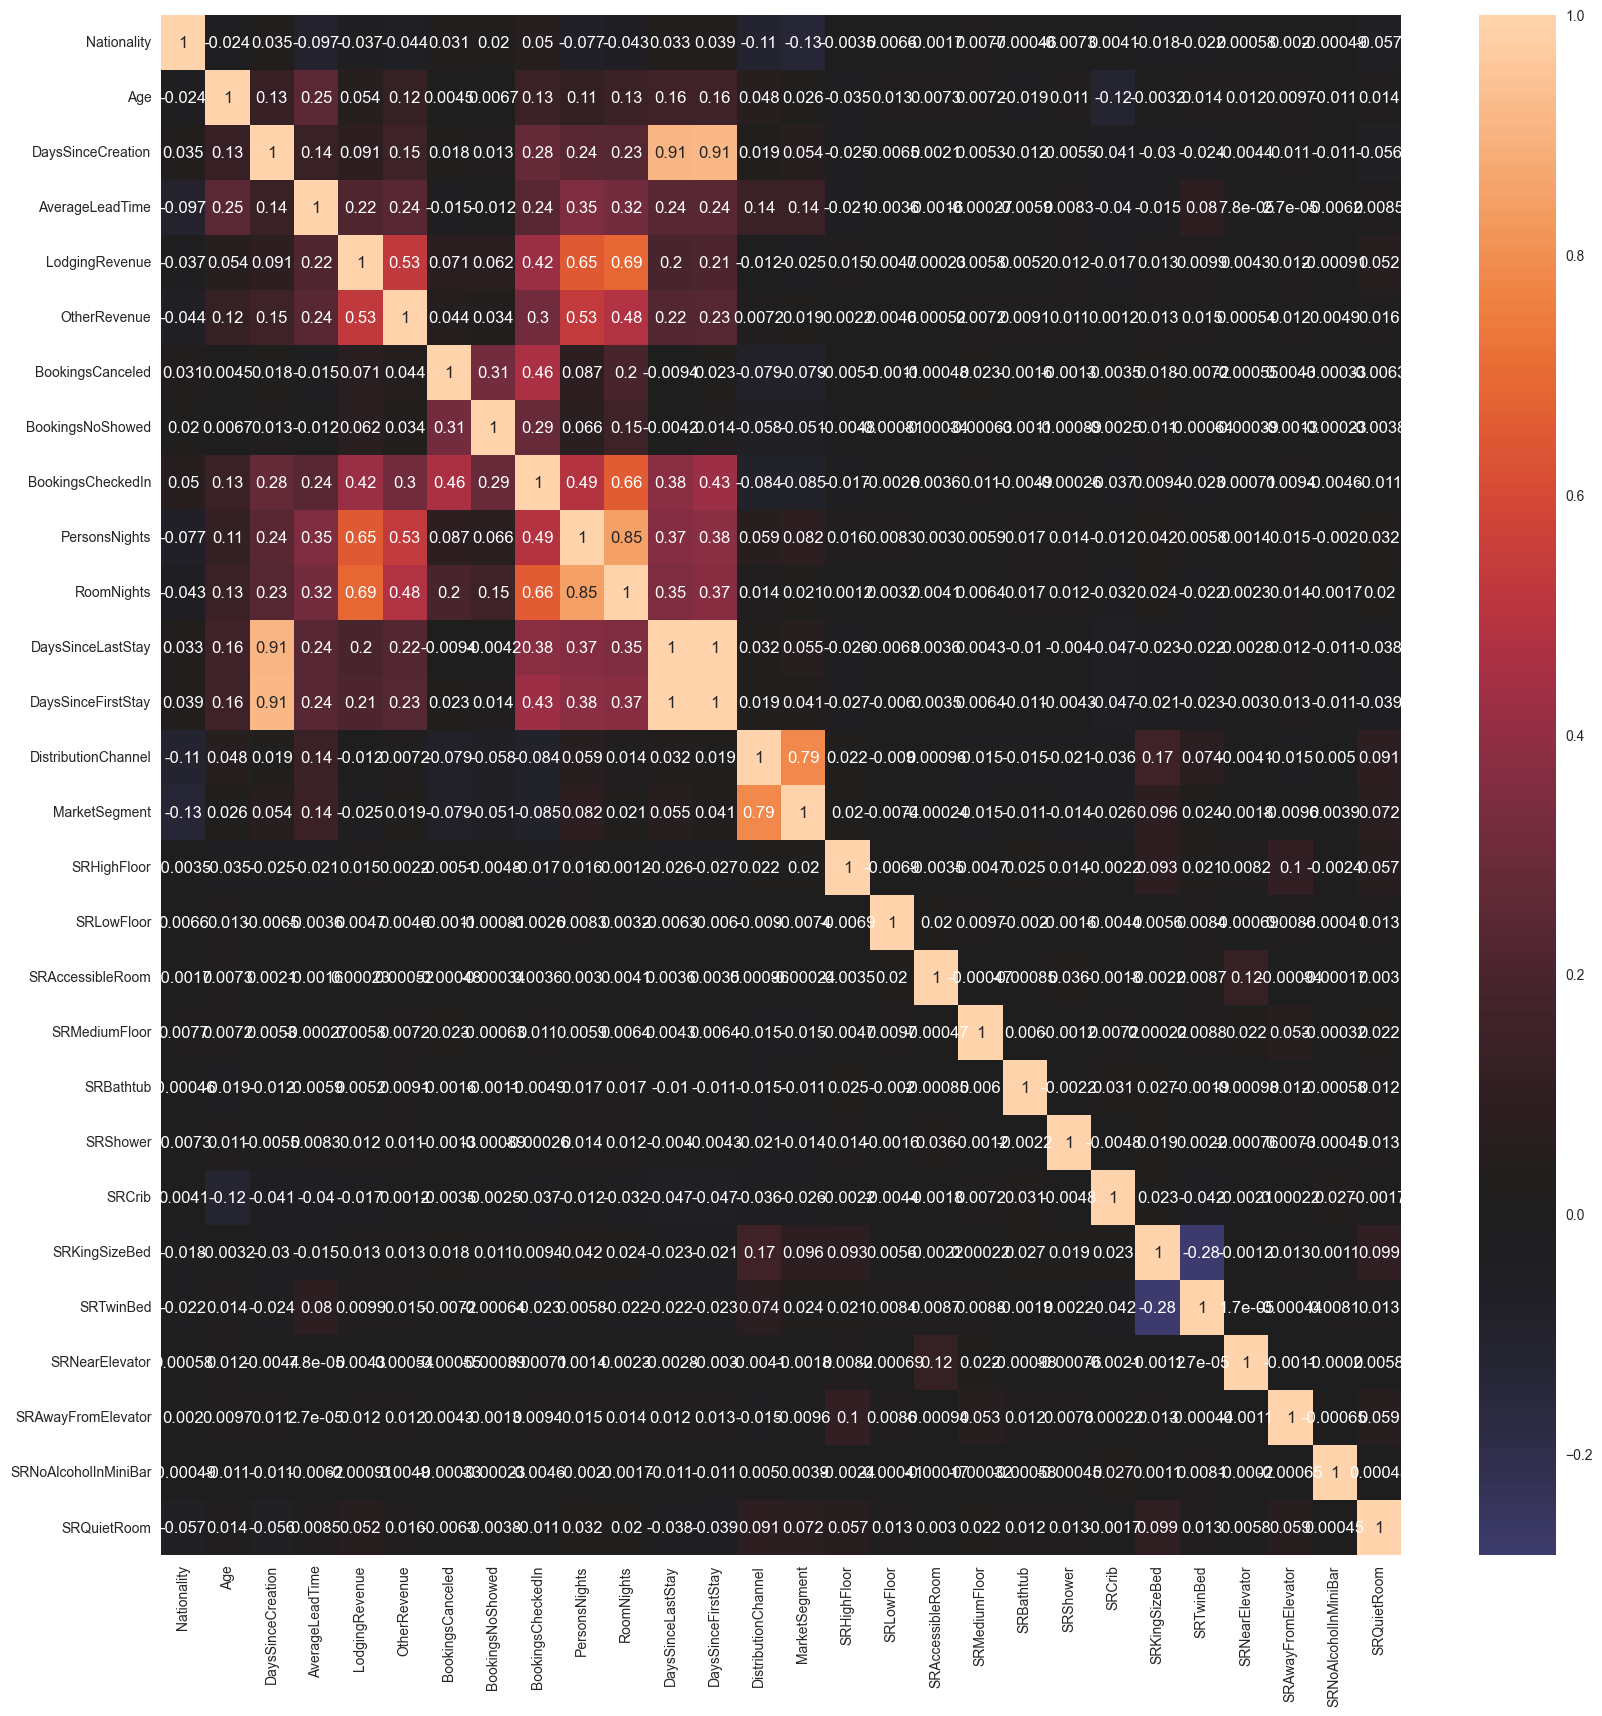

In [253]:
plt.figure(figsize=(20,20))  
sns.heatmap(data_wo_idhash.corr(), annot=True, center=0)

### Dimensionality reduction

In [254]:
def pca(df: pd.DataFrame) -> pd.DataFrame:
    pca = PCA(n_components=3)
    pca.fit(df)
    reduced_data = pd.DataFrame(pca.transform(df), columns=(["c1","c2", "c3"]))
    return reduced_data

In [255]:
reduced_data = pca(data_with_knn)
reduced_data_wo_idhash = pca(data_with_knn_wo_idhash)

### Determinating number of clusters

In [256]:
def elbow(df: pd.DataFrame):
    Elbow_M = KElbowVisualizer(KMeans(), k=10)
    Elbow_M.fit(df)
    Elbow_M.show()
    

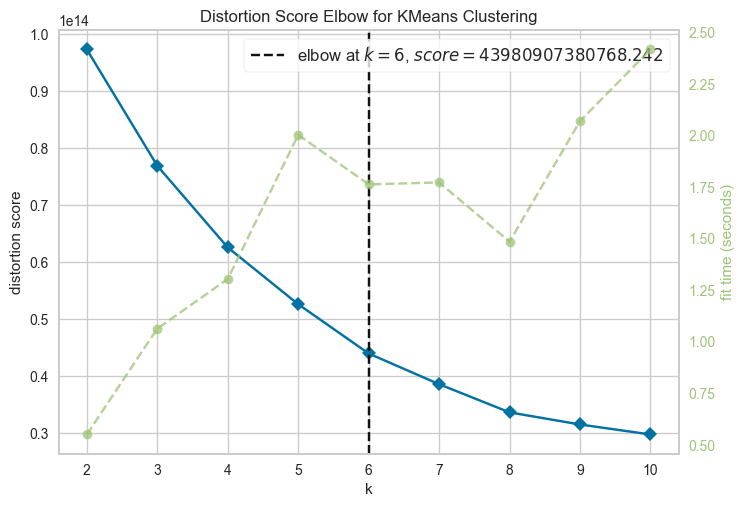

In [257]:
elbow(data_with_knn)

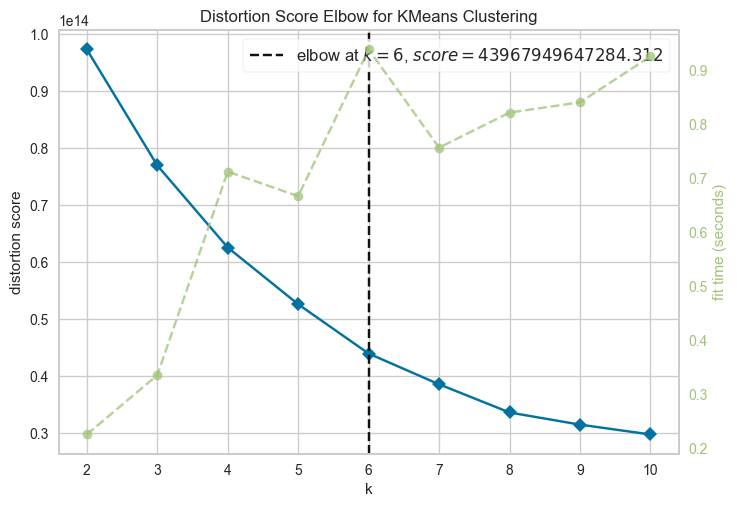

In [258]:
elbow(reduced_data)

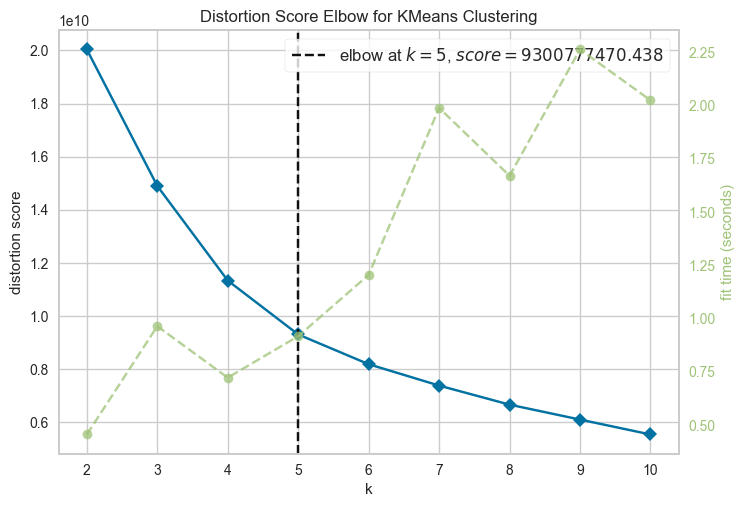

In [259]:
elbow(data_with_knn_wo_idhash)

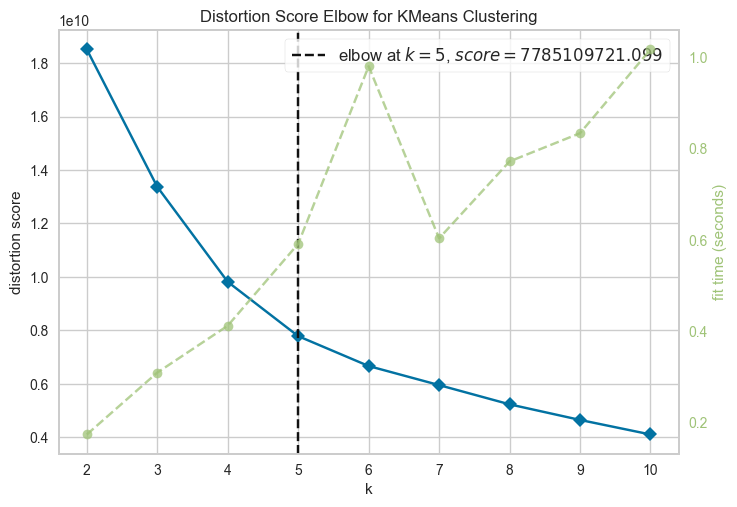

In [260]:
elbow(reduced_data_wo_idhash)

### Clustering Models

#### KMeans

In [261]:
def kmeans(num_of_clusters, df):
    features = df.copy()
    kmeans_model = KMeans(n_clusters=num_of_clusters)
    clust_labels = kmeans_model.fit_predict(features)
    features['Clusters'] = clust_labels
    return features, kmeans_model.labels_

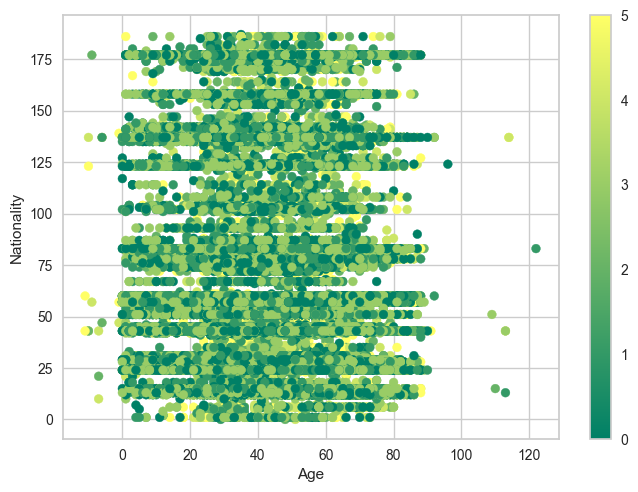

In [262]:
(features, labels) = kmeans(6, data_with_knn)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
ax.set_xlabel('Age')
ax.set_ylabel('Nationality')
plt.colorbar(scatter)

In [263]:
silhouette_score(features, labels)

0.2837825857414122

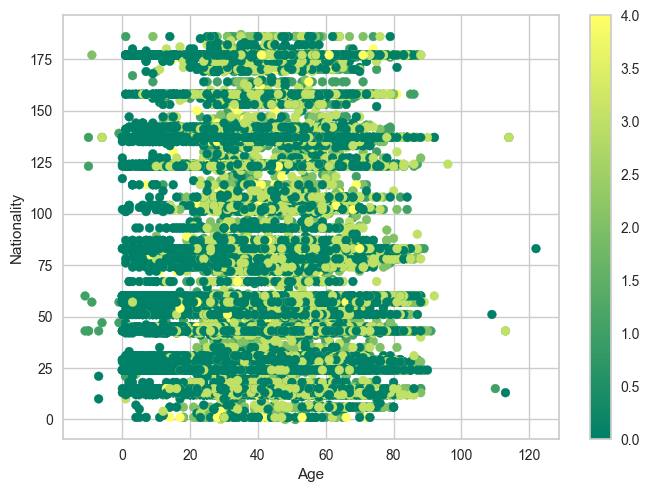

In [264]:
features, labels = kmeans(5, data_with_knn_wo_idhash)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
ax.set_xlabel('Age')
ax.set_ylabel('Nationality')
plt.colorbar(scatter)

In [265]:
silhouette_score(features, labels)

0.41541398239624383

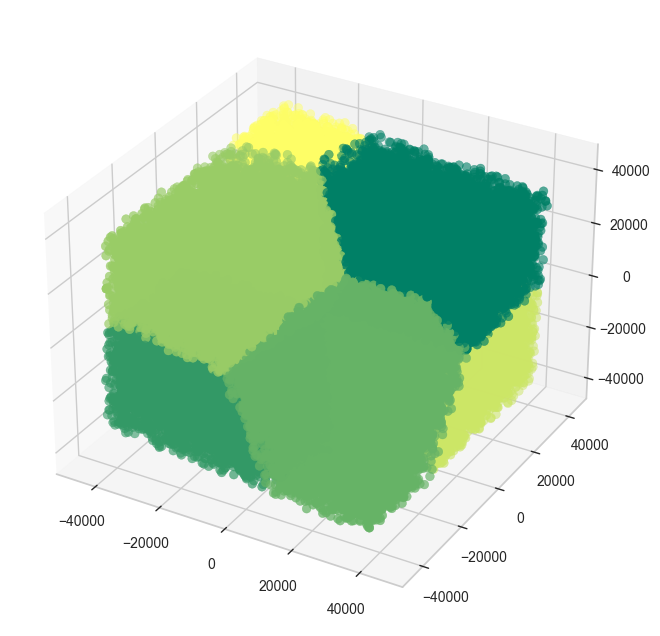

In [266]:
features, labels = kmeans(6, reduced_data)

def clusters_3d(features):
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111, projection='3d', label="bla")
    ax.scatter(features['c1'], features['c2'], features['c3'], s=40, c=features["Clusters"], marker='o', cmap='summer')
    plt.show()
clusters_3d(features)

In [267]:
silhouette_score(features, labels)

0.2838661338500256

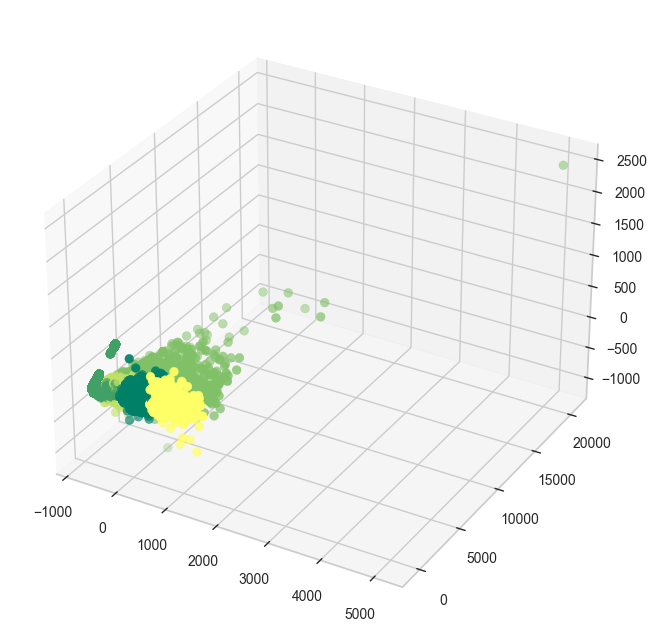

In [268]:
features, labels = kmeans(5, reduced_data_wo_idhash)
clusters_3d(features)

In [269]:
silhouette_score(features, labels)

0.4614168699354092

### Outliers

#### Age

In [270]:
data_with_knn_wo_idhash = data_with_knn_wo_idhash[(data_with_knn_wo_idhash["Age"]<=90)]
data_with_knn_wo_idhash = data_with_knn_wo_idhash[(data_with_knn_wo_idhash["Age"]>=0)]
data_with_knn_wo_idhash = data_with_knn_wo_idhash[data_with_knn_wo_idhash['AverageLeadTime'] >= 0] 

df = data_with_knn_wo_idhash
df.shape

(83550, 28)

#### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb5b6cc210>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb7fdd55d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb5b671d50>,
 'medians': [<matplotlib.lines.Line2D at 0x1bb5b6cc150>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bb5b7af110>,
 'means': []}

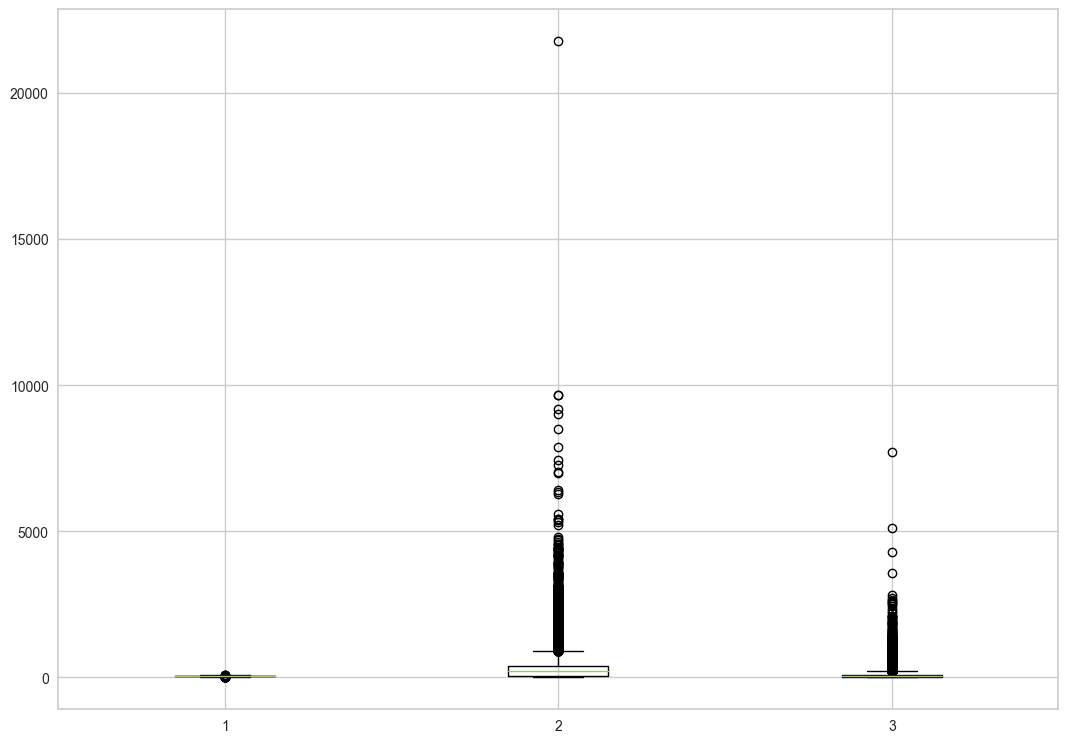

In [271]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(df.select_dtypes(include="float"))

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb7b673f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb5b77be90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb7fde9f50>,
 'medians': [<matplotlib.lines.Line2D at 0x1bb7b672c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bb6a8d6050>,
 'means': []}

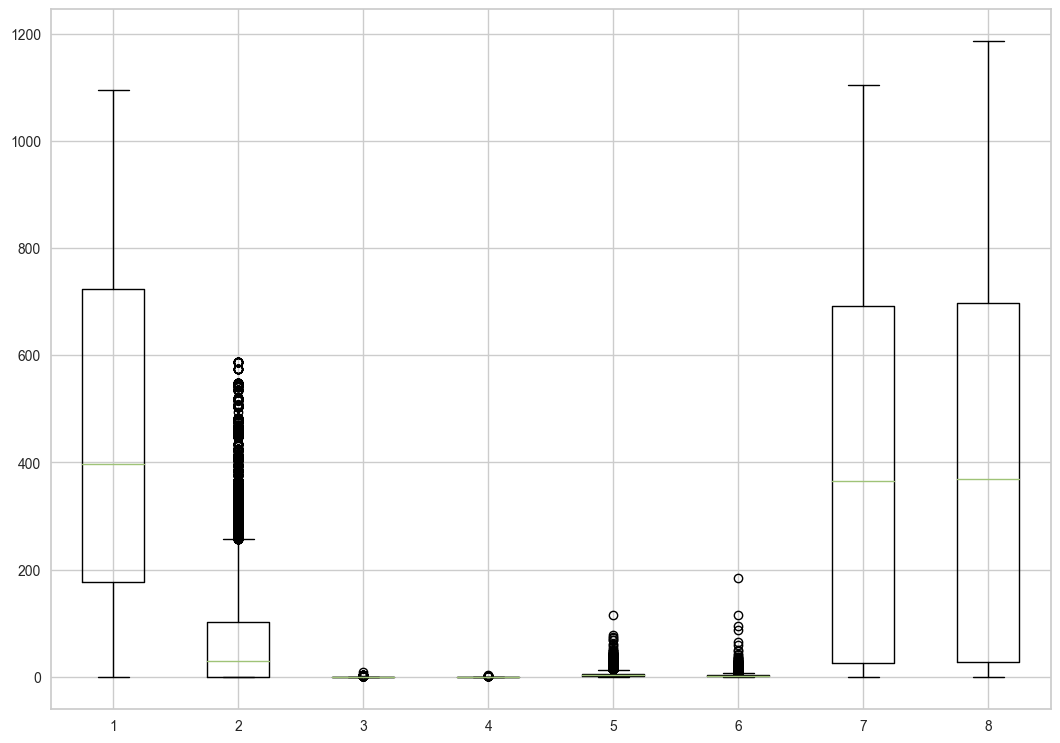

In [272]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot([df['DaysSinceCreation'], df['AverageLeadTime'], df['BookingsCanceled'], df['BookingsNoShowed'], df['PersonsNights'], df['RoomNights'], df['DaysSinceLastStay'], df['DaysSinceFirstStay']])

In [273]:
df.select_dtypes(include="float").skew()

Age               -0.166335
LodgingRevenue     6.576975
OtherRevenue      10.822453
dtype: float64

In [274]:
df[['AverageLeadTime', 'PersonsNights', 'RoomNights']].skew()

AverageLeadTime     1.910807
PersonsNights       1.928908
RoomNights         11.190691
dtype: float64

#### IQR

In [275]:
def outliers_detection(feature):
    percentiles = np.percentile(feature, [25,75])

    iqr = stats.iqr(feature)
    lower_limit = percentiles[0] - 1.5 * iqr
    upper_limit = percentiles[1] + 1.5 * iqr
    filtered = df[(feature <= lower_limit) & (feature >= upper_limit)] 
    return filtered.size

In [276]:
outliers_detection(df['AverageLeadTime'])

0

In [277]:
outliers_detection(df['OtherRevenue'])

0

In [278]:
outliers_detection(df['AverageLeadTime'])

0

In [279]:
outliers_detection(df['PersonsNights'])

0

In [280]:
outliers_detection(df['RoomNights'])

0

### Testing Models

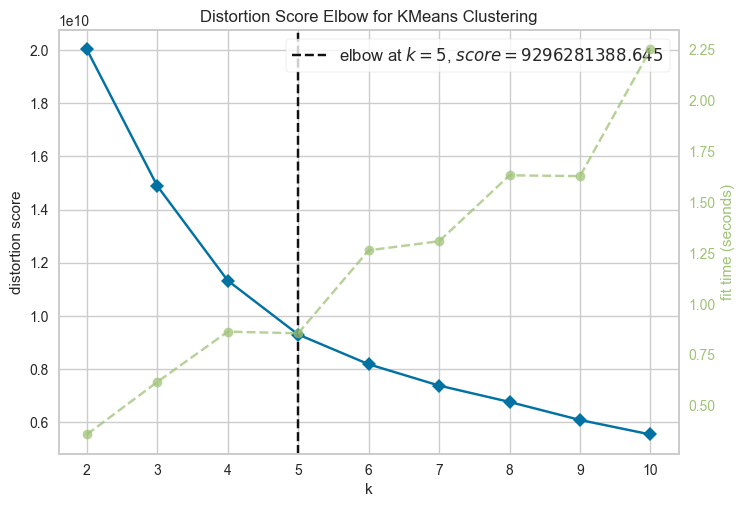

In [281]:
elbow(df)

In [282]:
features, labels = kmeans(5, df)

In [283]:
silhouette_score(features, labels)

0.41551072195117655

In [284]:
reduced_data = pca(df)

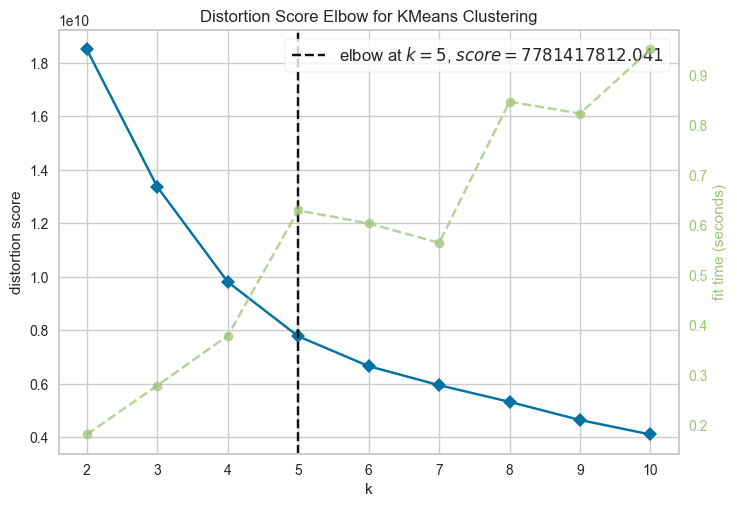

In [285]:
elbow(reduced_data)

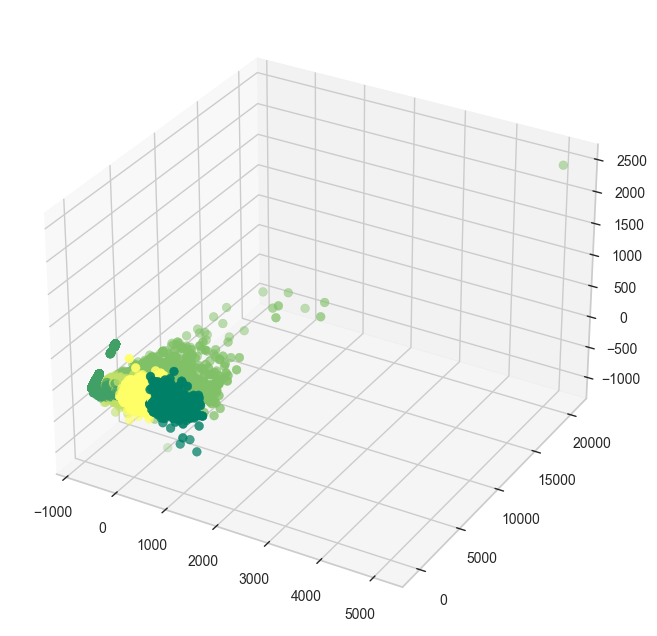

In [286]:
features, labels = kmeans(5, reduced_data)

clusters_3d(features)

In [287]:
silhouette_score(features, labels)

0.46151090229042185

#### Scalers

In [288]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

df_standard = standard.fit_transform(df)
df_minmax = minmax.fit_transform(df)
df_robust = robust.fit_transform(df)

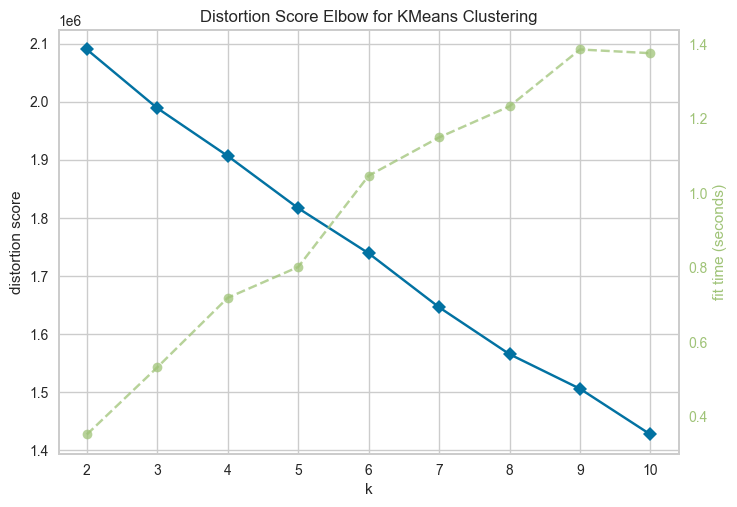

In [289]:
elbow(df_standard)

In [290]:
features = df_standard.copy()
kmeans_model = KMeans(n_clusters=15)
clust_labels = kmeans_model.fit_predict(features)
x1 = clust_labels
#features['Clusters'] = clust_labels


In [291]:
score1 = silhouette_score(features, kmeans_model.labels_)

In [292]:
reduced_df_standard = pca(df_standard)

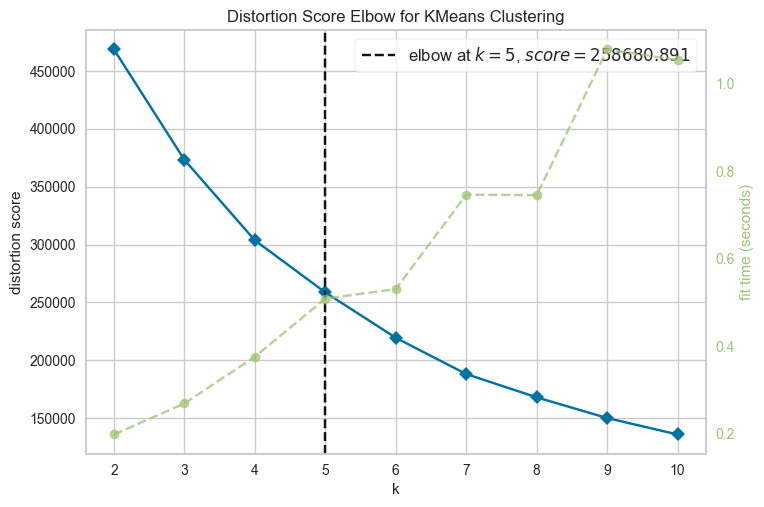

In [293]:
elbow(reduced_df_standard)

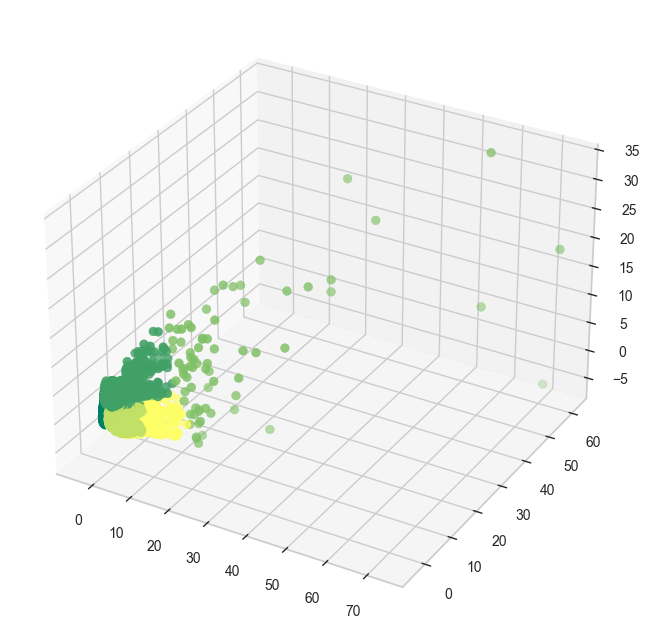

In [294]:
features, labels = kmeans(5, reduced_df_standard)
x2 = features['Clusters']
clusters_3d(features)

In [295]:
score2 = silhouette_score(features, labels)


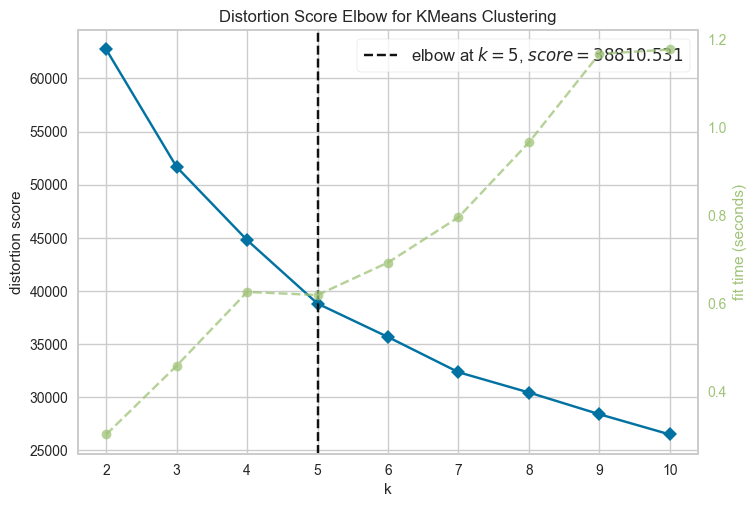

In [296]:
elbow(df_minmax)

In [297]:
features = df_minmax.copy()
kmeans_model = KMeans(n_clusters=5)
clust_labels = kmeans_model.fit_predict(features)
x3 = clust_labels

score3 = silhouette_score(features, kmeans_model.labels_)


In [298]:
reduced_df_minmax = pca(df_minmax)

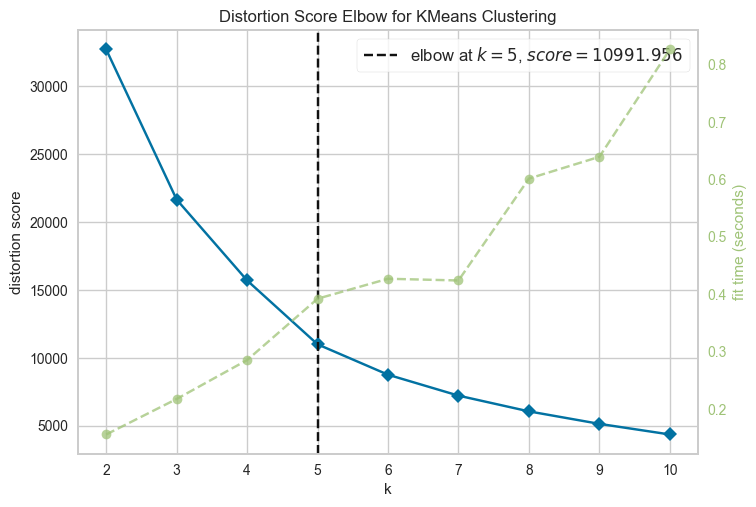

In [299]:
elbow(reduced_df_minmax)

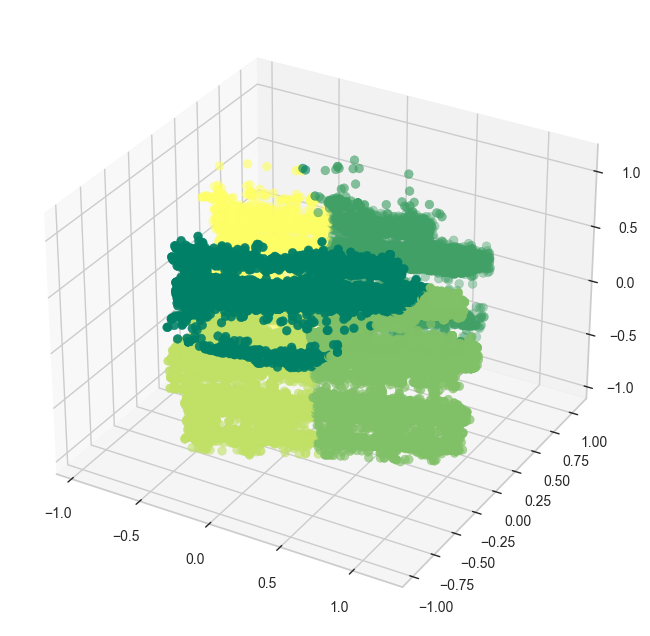

In [300]:
features, labels = kmeans(5, reduced_df_minmax)
x4 = features['Clusters']
clusters_3d(features)

In [301]:
score4=silhouette_score(features, labels)


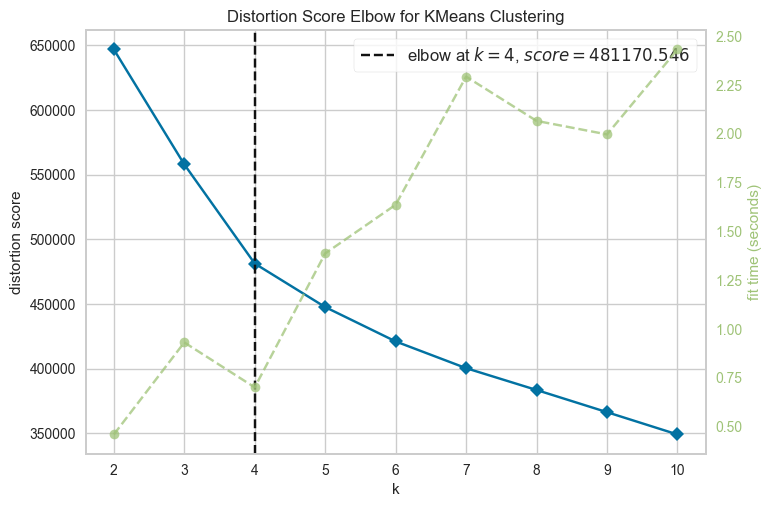

In [302]:
elbow(df_robust)

In [303]:
features = df_robust.copy()
kmeans_model = KMeans(n_clusters=4)
clust_labels = kmeans_model.fit_predict(features)
x5 = clust_labels

score5 = silhouette_score(features, kmeans_model.labels_)

In [304]:
reduced_df_robust = pca(df_robust)

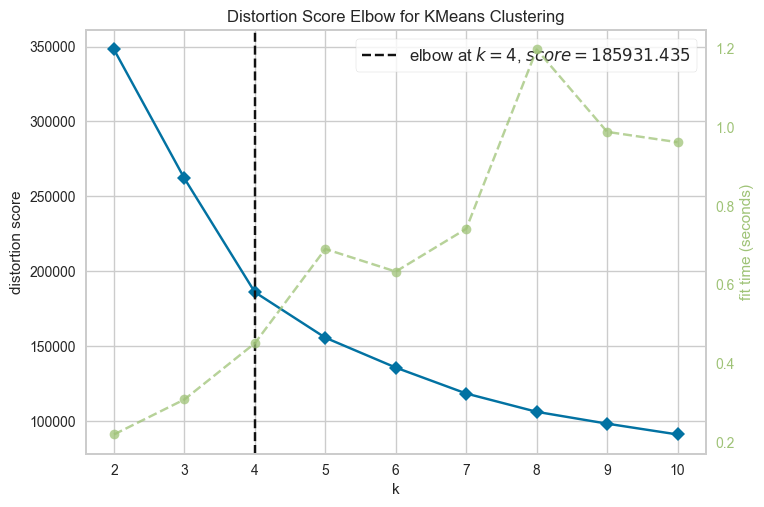

In [305]:
elbow(reduced_df_robust)

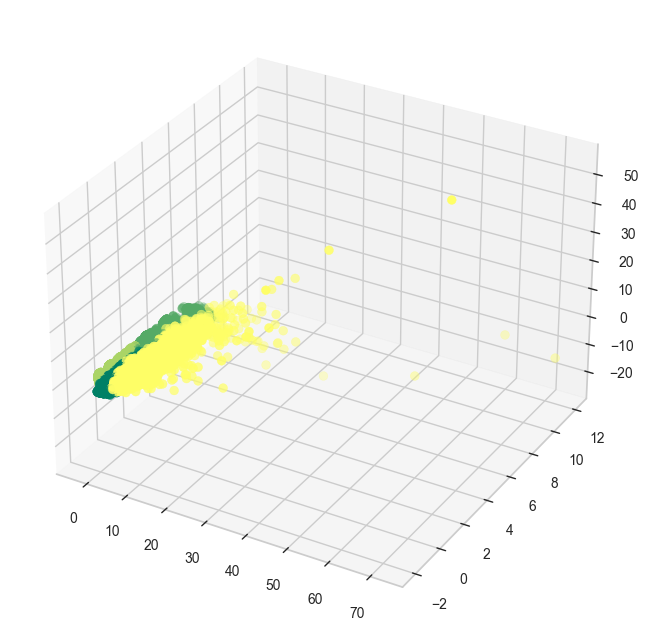

In [306]:
features, labels = kmeans(4, reduced_df_robust)
x6 = features['Clusters']
clusters_3d(features)

In [307]:
score6 = silhouette_score(features, labels)

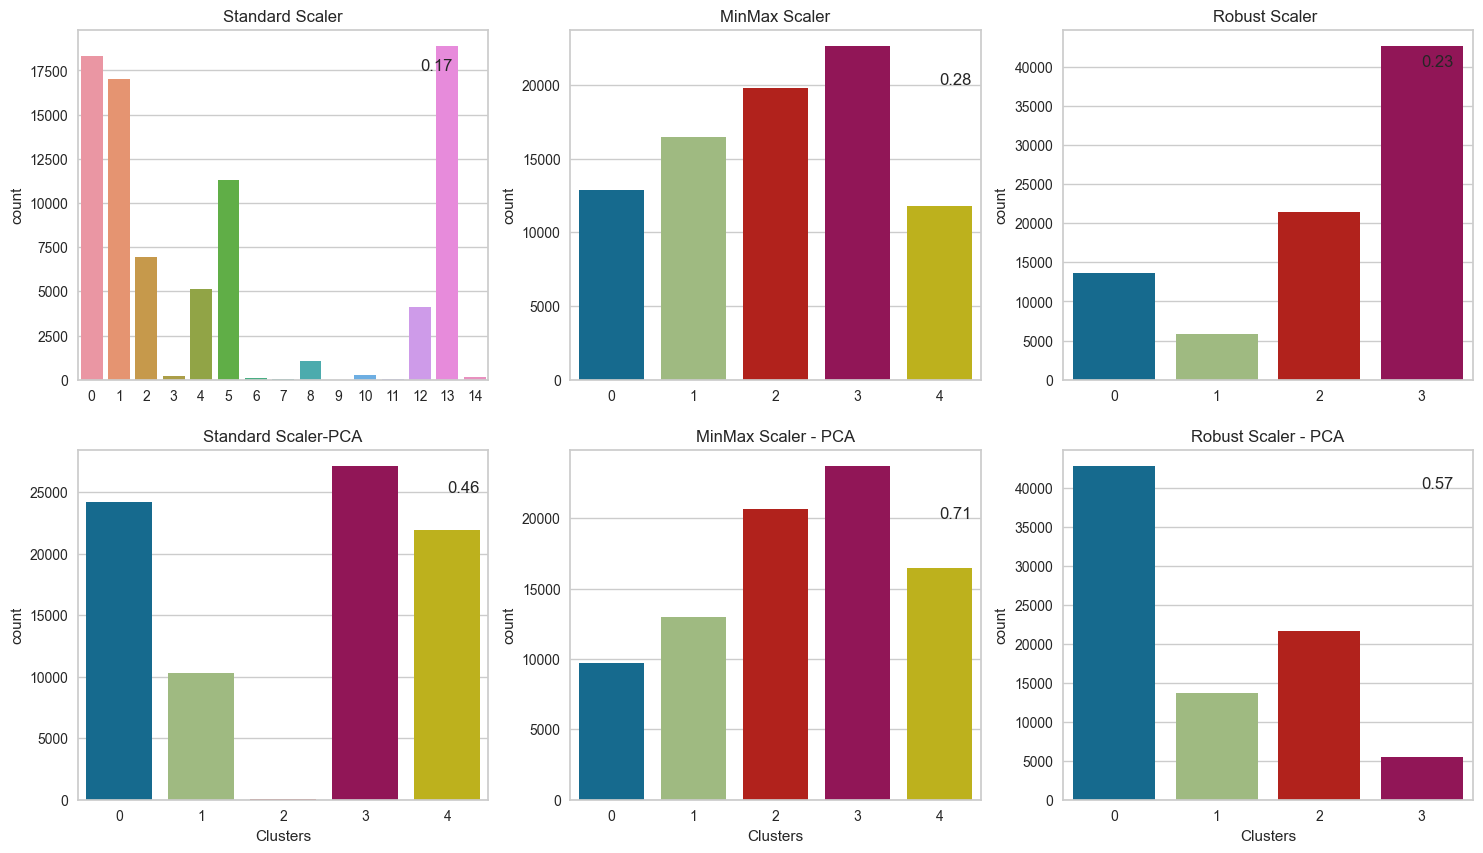

In [308]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
pl1 = sns.countplot(ax=axes[0,0], x = x1)
pl1.set_title("Standard Scaler")
pl1.text(12,17500,str(round(score1,2)))

pl2 = sns.countplot(ax=axes[1,0], x = x2)
pl2.set_title("Standard Scaler-PCA")
pl2.text(4,25000,str(round(score2,2)))

pl3 = sns.countplot(ax=axes[0,1], x = x3)
pl3.set_title("MinMax Scaler")
pl3.text(4,20000,str(round(score3,2)))

pl4 = sns.countplot(ax=axes[1,1], x = x4)
pl4.set_title("MinMax Scaler - PCA")
pl4.text(4,20000,str(round(score4,2)))

pl5 = sns.countplot(ax=axes[0,2], x = x5)
pl5.set_title("Robust Scaler ")
pl5.text(3,40000,str(round(score5,2)))

pl6 = sns.countplot(ax=axes[1,2], x = x6)
pl6.set_title("Robust Scaler - PCA")
pl6.text(3,40000,str(round(score6,2)))

plt.show()

### Feature Selection

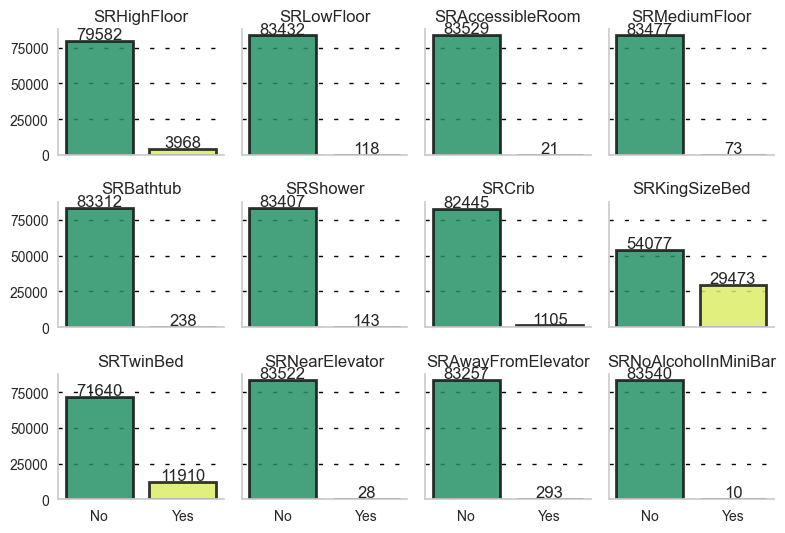

In [309]:
cols = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 
                 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 
                 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']
fig, axes = plt.subplots(3, 4, sharex = True, sharey = True, squeeze = False)
for i, ax in enumerate(axes.flatten()):
    counts = df[cols[i]].value_counts()
    g = ax.bar(counts.index, counts.values, color=['#249266', '#dbed66'], 
               alpha=0.85, edgecolor='k', linewidth=2)
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., \
                                               p.get_height()), ha = 'center', va = 'top', \
                                               xytext = (0, 10), textcoords = 'offset points')
    ax.set_title(f'{cols[i]}')
    plt.xticks([0, 1], ['No', 'Yes'])
    ax.xaxis.grid(False, which='major')
    ax.yaxis.grid(True, linestyle=':', color='black', dashes=(3, 8))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()


In [310]:
selected_features=df.drop(columns=['SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower', 'SRLowFloor','SRNearElevator','SRAwayFromElevator','SRNoAlcoholInMiniBar', 'SRCrib'])

In [311]:
selected_features.shape

(83550, 19)

### BIRCH 

In [312]:
from sklearn.cluster import Birch

features = selected_features.copy()
brc = Birch(n_clusters=None)
clust_labels = brc.fit_predict(features)
features['Clusters'] = clust_labels


In [313]:
silhouette_score(features, brc.labels_)

0.07478614620786558

In [314]:
reduced_selected_features = pca(selected_features)

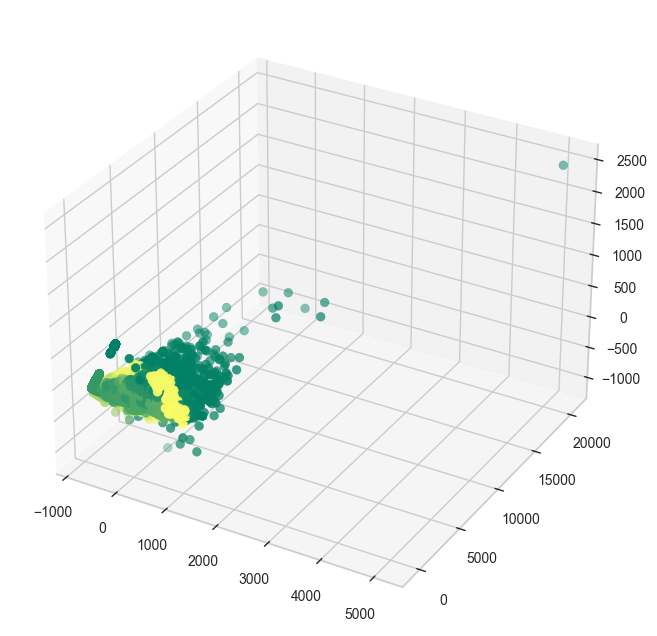

In [315]:
features = reduced_selected_features.copy()
brc = Birch(n_clusters=None)
clust_labels = brc.fit_predict(features)
features['Clusters'] = clust_labels

clusters_3d(features)

In [316]:
silhouette_score(features, brc.labels_)

0.2887004973512953

### Data subset

In [317]:
df['Nationality'].value_counts()

57     12417
137    11589
43     10225
60      8653
51      4900
       ...  
66         1
64         1
159        1
151        1
125        1
Name: Nationality, Length: 187, dtype: int64

In [318]:
top_10 = df['Nationality'].value_counts().head(10)
top_10

57     12417
137    11589
43     10225
60      8653
51      4900
177     3426
83      3364
15      3118
24      2901
123     2724
Name: Nationality, dtype: int64

In [319]:
top_10_df = df.loc[df['Nationality'].isin(top_10.index)]
top_10_df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,137,51.000000,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
1,137,45.398028,1095,61,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
2,43,31.000000,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57,60.000000,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,57,51.000000,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83581,43,48.000000,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83582,57,49.000000,0,91,143.0,2.0,0,0,1,2,...,0,0,0,0,1,0,0,0,0,0
83583,137,49.000000,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83584,83,52.000000,0,116,336.9,105.5,0,0,1,8,...,0,0,0,0,0,0,0,0,0,0


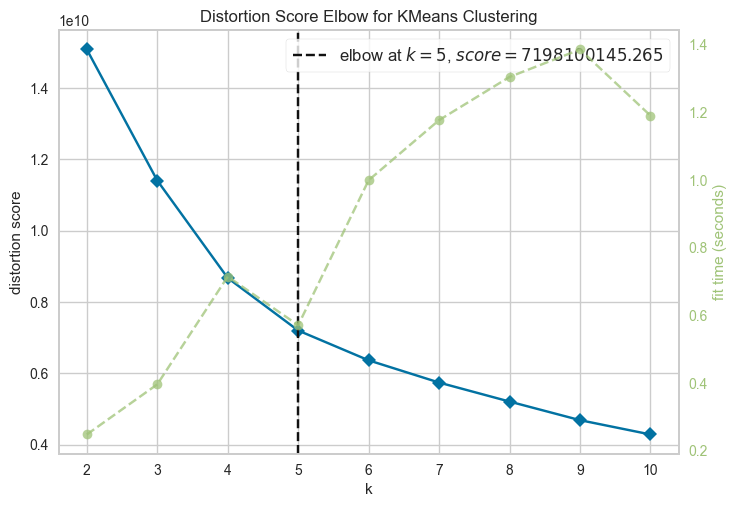

In [320]:
elbow(top_10_df)

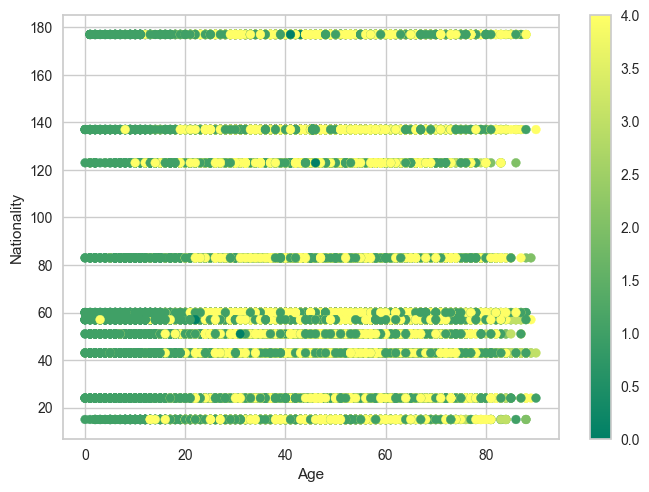

In [321]:
from sklearn.cluster import AgglomerativeClustering

features = top_10_df.copy()
ac = AgglomerativeClustering(n_clusters=5)
clust_labels = ac.fit_predict(features)
features['Clusters'] = clust_labels

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
ax.set_xlabel('Age')
ax.set_ylabel('Nationality')
plt.colorbar(scatter)



In [322]:
silhouette_score(features, ac.labels_)

0.38716279047012253

#### Scalers

In [323]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

df_standard = standard.fit_transform(top_10_df)
df_minmax = minmax.fit_transform(top_10_df)
df_robust = robust.fit_transform(top_10_df)

Minmax Scaler

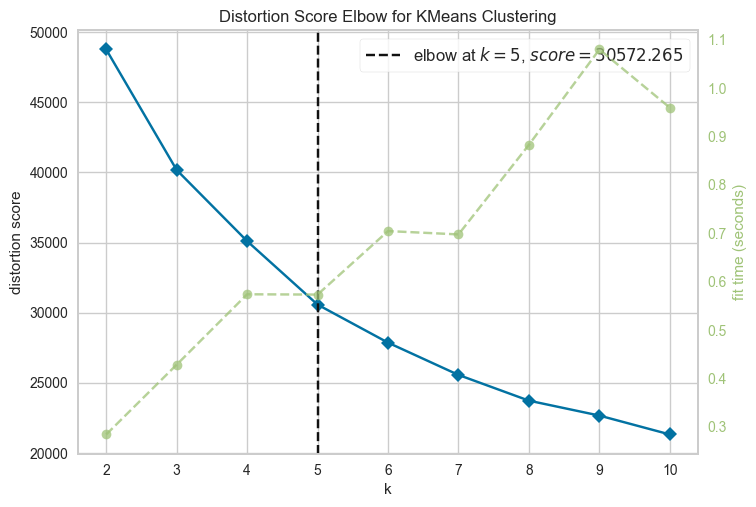

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [324]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_minmax)
Elbow_M.show()

In [325]:
from sklearn.cluster import AgglomerativeClustering

features = df_minmax.copy()
ac = AgglomerativeClustering(n_clusters=5)
clust_labels = ac.fit_predict(features)
# features['Clusters'] = clust_labels

# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
# ax.set_xlabel('Age')
# ax.set_ylabel('Nationality')
# plt.colorbar(scatter)

silhouette_score(features, clust_labels)

0.2116869707724589

Standard Scaler

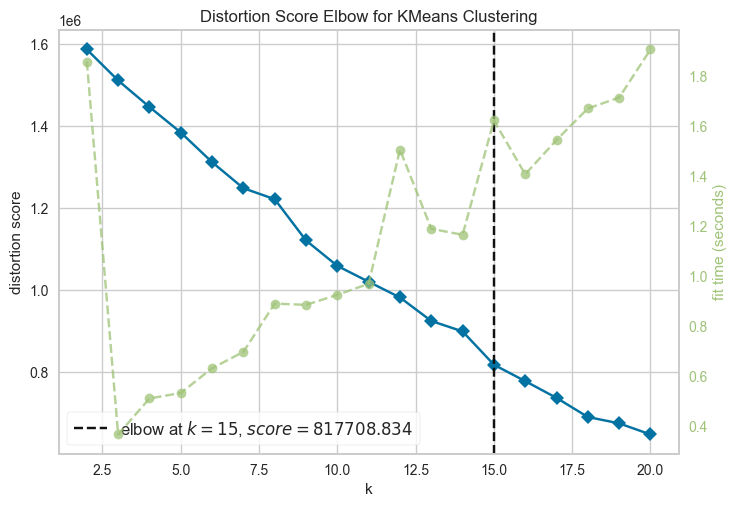

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [326]:
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(df_standard)
Elbow_M.show()

In [327]:
features = df_standard.copy()
ac = AgglomerativeClustering(n_clusters=14)
clust_labels = ac.fit_predict(features)
# features['Clusters'] = clust_labels

# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
# ax.set_xlabel('Age')
# ax.set_ylabel('Nationality')
# plt.colorbar(scatter)

silhouette_score(features, clust_labels)

0.18927892588058978

Robust Scaler

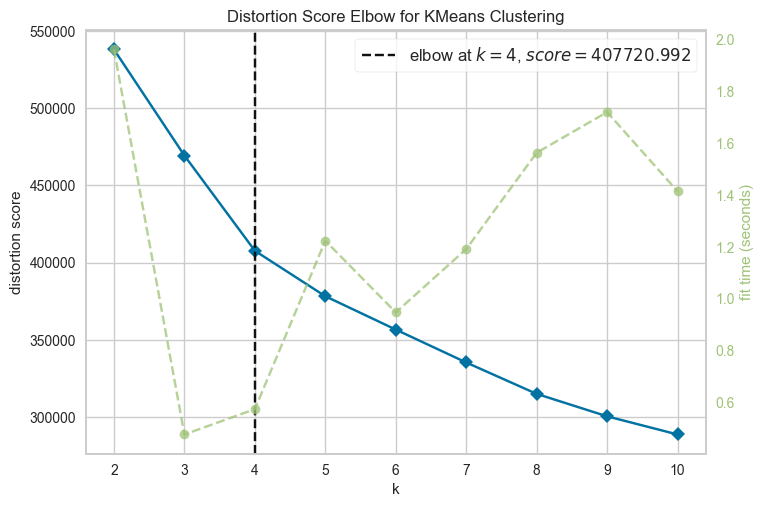

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [328]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_robust)
Elbow_M.show()

In [329]:
features = df_robust.copy()
ac = AgglomerativeClustering(n_clusters=4)
clust_labels = ac.fit_predict(features)
# features['Clusters'] = clust_labels

# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(features['Age'], features['Nationality'], c=features['Clusters'], s=40, cmap='summer')
# ax.set_xlabel('Age')
# ax.set_ylabel('Nationality')
# plt.colorbar(scatter)

silhouette_score(features, clust_labels)

0.2291167831262719